## Algorithm Evaluation

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Import dataset

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Check missing value

In [6]:
s=df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Seperate X and Y
X -> other than survives column(Drop statistically insignificant columns and dependant value)
Y -> Survived 

In [7]:
X = df.drop(columns=["PassengerId","Survived","Name","Ticket"])
Y = df[["Survived"]]

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Seperate cat and con columns from X

In [10]:
cat = list(X.columns[X.dtypes=="object"])
con = list(X.columns[X.dtypes!="object"])

In [11]:
cat

['Sex', 'Cabin', 'Embarked']

In [12]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Create prprocessing pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
## create numerical pipeline

num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ("scaler",StandardScaler())])

## create catagorical pipeline
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ("ohe",OneHotEncoder(handle_unknown="ignore"))])


In [15]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [16]:
cat_pipe

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='unknown', strategy='constant')),
                ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [17]:
## combine both pipeline
pre= ColumnTransformer([('num',num_pipe,con),
                   ('cat',cat_pipe,cat)])
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Cabin', 'Embarked'])])

In [18]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.63878901,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.2846632 , -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ]])

In [19]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       '

In [20]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Split train test data

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [22]:
xtrain.shape

(712, 159)

In [23]:
xtest.shape

(179, 159)

### Algo evaluation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [25]:
dct={'Logistic': LogisticRegression(),
     'Decision Tree': DecisionTreeClassifier(),
     'Random Forest': RandomForestClassifier(),
     'Gradient Boosting': GradientBoostingClassifier(),
     'KNN': KNeighborsClassifier(),
     'SVM': SVC()}

In [26]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [27]:
from sklearn.metrics import f1_score 
from sklearn.model_selection import cross_val_score 
tr=[]
tr_cv=[]
ts=[]
for name,model in dct.items():
    # fit model
    model.fit(xtrain,ytrain)
    # Predicted values in training 
    ypred_tr=model.predict(xtrain)
    # Predicted values in training
    ypred_ts= model.predict(xtest)
    #check F1 Score
    f1_tr = f1_score(ytrain,ypred_tr)
    tr.append(f1_tr)
    # Calculate F1 score in cross validation
    score = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_cv=score.mean()
    tr_cv.append(f1_cv)
    # calculate f1 score in testing
    f1_ts = f1_score(ytest,ypred_ts)
    ts.append(f1_ts)
    ## Print the result
    print(f'model name : {name}\n')
    print(f'training F1 : {f1_tr}')
    print(f'training F1 CV : {f1_cv}')
    print(f'testing F1 : {f1_ts}')
    print('\n=============================\n')


model name : Logistic

training F1 : 0.7722007722007722
training F1 CV : 0.7082079808204733
testing F1 : 0.7777777777777778


model name : Decision Tree

training F1 : 0.9791271347248577
training F1 CV : 0.6843357868558375
testing F1 : 0.7581699346405228


model name : Random Forest

training F1 : 0.9792060491493384
training F1 CV : 0.7256447512566272
testing F1 : 0.7407407407407408


model name : Gradient Boosting

training F1 : 0.8588709677419355
training F1 CV : 0.7504644244644245
testing F1 : 0.7407407407407408


model name : KNN

training F1 : 0.8149606299212598
training F1 CV : 0.7093623689892331
testing F1 : 0.7246376811594203


model name : SVM

training F1 : 0.7731755424063116
training F1 CV : 0.7551257176223677
testing F1 : 0.7659574468085106




In [28]:
eval_dct = {'model name':list(dct.keys()),
            'train f1': tr,
            'test f1':ts,
            'train f1 cv':tr_cv}
eval_dct

{'model name': ['Logistic',
  'Decision Tree',
  'Random Forest',
  'Gradient Boosting',
  'KNN',
  'SVM'],
 'train f1': [0.7722007722007722,
  0.9791271347248577,
  0.9792060491493384,
  0.8588709677419355,
  0.8149606299212598,
  0.7731755424063116],
 'test f1': [0.7777777777777778,
  0.7581699346405228,
  0.7407407407407408,
  0.7407407407407408,
  0.7246376811594203,
  0.7659574468085106],
 'train f1 cv': [0.7082079808204733,
  0.6843357868558375,
  0.7256447512566272,
  0.7504644244644245,
  0.7093623689892331,
  0.7551257176223677]}

In [29]:
eval_df =pd.DataFrame(eval_dct)
eval_df

,model name,train f1,test f1,train f1 cv
0,Logistic,0.772201,0.777778,0.708208
1,Decision Tree,0.979127,0.758170,0.684336
2,Random Forest,0.979206,0.740741,0.725645
3,Gradient Boosting,0.858871,0.740741,0.750464
4,KNN,0.814961,0.724638,0.709362
5,SVM,0.773176,0.765957,0.755126


In [30]:
eval_df.sort_values(by='test f1',ascending=False)

,model name,train f1,test f1,train f1 cv
0,Logistic,0.772201,0.777778,0.708208
5,SVM,0.773176,0.765957,0.755126
1,Decision Tree,0.979127,0.758170,0.684336
2,Random Forest,0.979206,0.740741,0.725645
3,Gradient Boosting,0.858871,0.740741,0.750464
4,KNN,0.814961,0.724638,0.709362


### Create and Tune Logistic Regression

In [31]:
params = {'C':[0.01,0.1,1,10,50,100,1000]}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 1000]},
                   scoring='f1')

In [33]:
rscv.best_params_

{'C': 10}

In [34]:
rscv.best_score_

0.724031219325337

In [35]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=10)

### Evaluate test and train

In [36]:
best_lr.score(xtrain,ytrain)

0.851123595505618

In [37]:
best_lr.score(xtest,ytest)

0.8044692737430168

#### Predict results in train and test

In [38]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [39]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [40]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [41]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [42]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### create a confusion matrix of test data

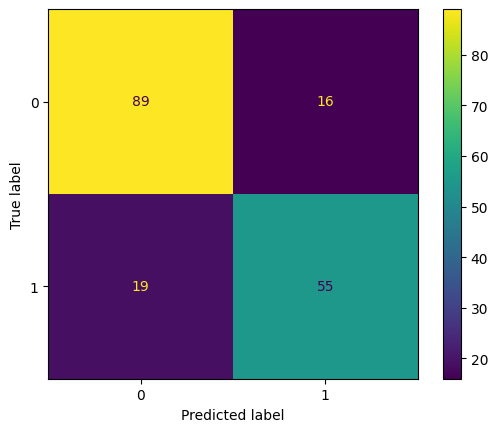

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_lr.classes_)
cfd.plot() 

### Check the classification report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



### Plotting ROC- AUC curve for train and test data

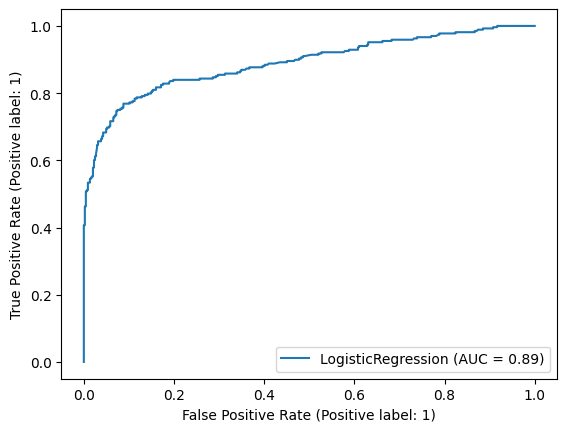

In [48]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)

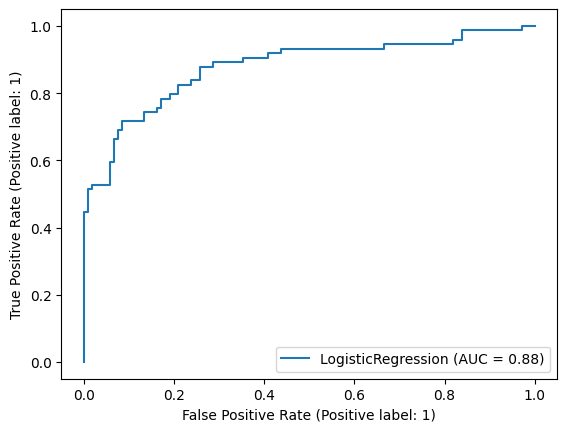

In [49]:
RocCurveDisplay.from_estimator(best_lr,xtest,ytest)

In [50]:
# Predicting test_titanic.csv

In [51]:
xnew = pd.read_csv("test_titanic.csv")
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.36944878, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  1.33137817,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36936484,  2.48569343, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82737724,  0.67726619, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  0.        , -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  0.        ,  0.43279337, ...,  0.        ,
         0.        ,  0.        ]])

In [55]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,0.369449,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.827377,1.331378,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.369365,2.485693,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.827377,-0.207709,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.827377,-0.592481,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,0.000000,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
414,-1.566107,0.715743,-0.474545,-0.473674,1.544246,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,0.827377,0.677266,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
416,0.827377,0.000000,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Perform prediction

In [56]:
preds = best_lr.predict(xnew_pre)
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### Probability

In [59]:
prob = best_lr.predict_proba(xnew_pre)[:,1]
prob

array([0.10968305, 0.3761994 , 0.08990086, 0.10558338, 0.58251017,
       0.16093389, 0.69347508, 0.15580082, 0.78956582, 0.07129462,
       0.09617299, 0.23544826, 0.94961922, 0.04910213, 0.67445333,
       0.83538222, 0.21420486, 0.17750497, 0.56003356, 0.57924494,
       0.2089658 , 0.16682727, 0.90010223, 0.54714768, 0.95697894,
       0.03468228, 0.9710933 , 0.16951834, 0.41198388, 0.07486051,
       0.0772178 , 0.13559852, 0.4623489 , 0.49628666, 0.34679871,
       0.19146958, 0.6235081 , 0.69643222, 0.11319819, 0.11785219,
       0.09219941, 0.51134326, 0.06535395, 0.78719308, 0.8787218 ,
       0.11245999, 0.46983727, 0.12829957, 0.9075922 , 0.51964709,
       0.51270345, 0.28333716, 0.70813052, 0.82541703, 0.26393012,
       0.06598668, 0.08036988, 0.11119826, 0.07143282, 0.9828271 ,
       0.14567652, 0.18122483, 0.14103283, 0.75286222, 0.80361509,
       0.79522607, 0.77957544, 0.2426616 , 0.59715725, 0.70312174,
       0.73880861, 0.12814541, 0.62944601, 0.61837225, 0.97908

#### Save this prediction in dataframe

In [60]:
df_final = xnew[["PassengerId"]]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [61]:
df_final['Survived_pred']=preds
df_final

,PassengerId,Survived_pred
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
df_final['Survived_prob']=prob
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.109683
1,893,0,0.376199
2,894,0,0.089901
3,895,0,0.105583
4,896,1,0.582510
...,...,...,...
413,1305,0,0.096236
414,1306,1,0.961472
415,1307,0,0.071073
416,1308,0,0.096236
